<div style="display: flex; justify-content: center;">
    <img src="../images/Logo-personal_Fondo_blanco.png" alt="Logo_personal" /> 
</div>
<p align="center">
  <h1 align="center">Matplotlib and seaborn libraries<h1>
  <h4 align="center">Dataset of Global methane emissions</h4>
</p>

---

## Introduction
This notebook is made in the practice of the course: ["Curso de Visualización de Datos con Matplotlib y Seaborn"](https://platzi.com/cursos/matplotlib-seaborn/), 

For more information share the notes in Notion of the course with more functions [View site ](https://aluminum-carbon-41d.notion.site/C-B-de-Visualizaci-n-de-Datos-con-Matplotlib-y-Seaborn-d58a2bf6689d4ca3b1e28fbb9a584086?pvs=4)

## Data
The Data set ["Methane_final"](https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions) of kaggel contains a 

___


#Analysis of methane emissions by world regions

___
## Development
### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries installed')

Libraries installed


### Import the dataset

In [4]:
df_emissions = pd.read_csv("../data/Methane_final.csv", sep=",",header=0)
df_emissions.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


### Bar plot 

See through a bar plot the amount of emissions for each region and for years, making a bias by year.
We define the color palette that we will use in the graphics

The region "Wolrd" sum the others regions

In [6]:
colors=["#9b4b54","#c79fa4"]

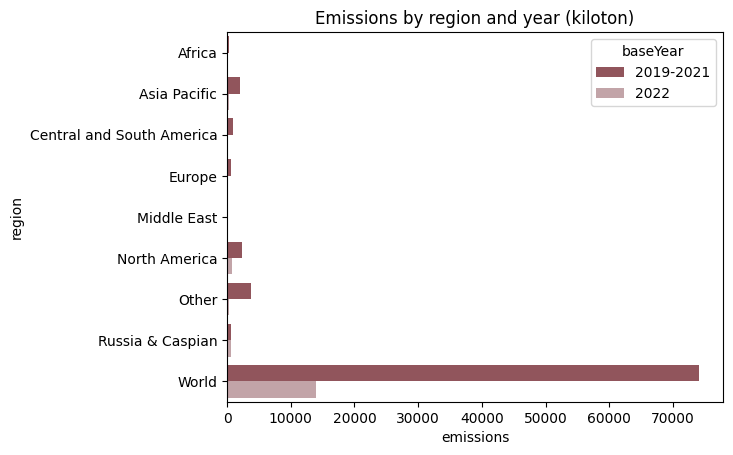

In [34]:
sns.barplot(data = df_emissions, y ="region", x ="emissions", hue = "baseYear", errorbar=None, palette=colors)
plt.title("Emissions by region and year (kiloton)")
plt.show()

### Remove the "World" region to evaluate the regions independently
La region "World" suma el total de regiones, como buena practica debemos evaluar las categorías por separado.

* Make a copy of the original data frame so as not to affect the data.
* Redefine the new data frame to filter only records that do not have the "World" attribute
* Graph the bar plot again

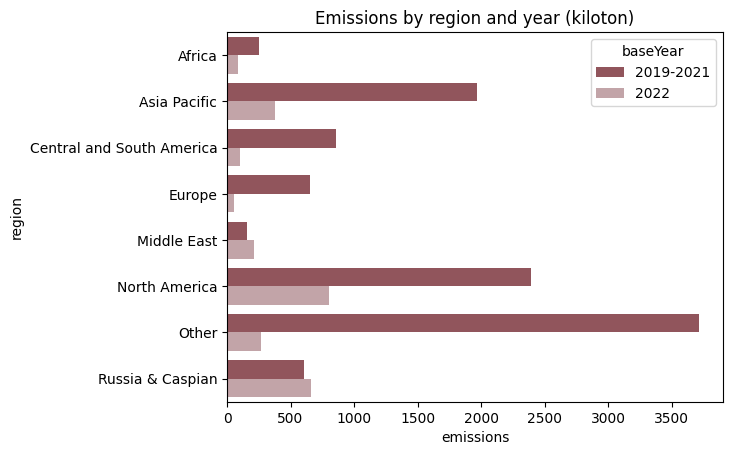

In [38]:
df_copy_emissions = df_emissions.copy()
df_copy_emissions = df_emissions[~(df_emissions["region"] == "World")]

sns.barplot(data = df_copy_emissions, y ="region", x ="emissions", hue="baseYear", errorbar=None, palette=colors)
plt.title("Emissions by region and year (kiloton)")
plt.show()

### Grouping by region adding total emissions
It is observed that the previous graphs are not adding the emissions by regions.

* For the seaborn graph to add the data instead of counting it, it is necessary to first group by region, add the values and reset the indices.
* Sort the dataframe in ascending order to decrease the cognitive load on the graph

In [44]:
df_region_by_emmision = df_copy_emissions.groupby("region").sum().reset_index()
df_region_by_emmision["emissions"]

0     54197.152613
1    177699.611465
2     45639.989799
3     49208.996818
4     38095.798763
5     63347.409177
6     15997.357175
7     62421.612360
Name: emissions, dtype: float64

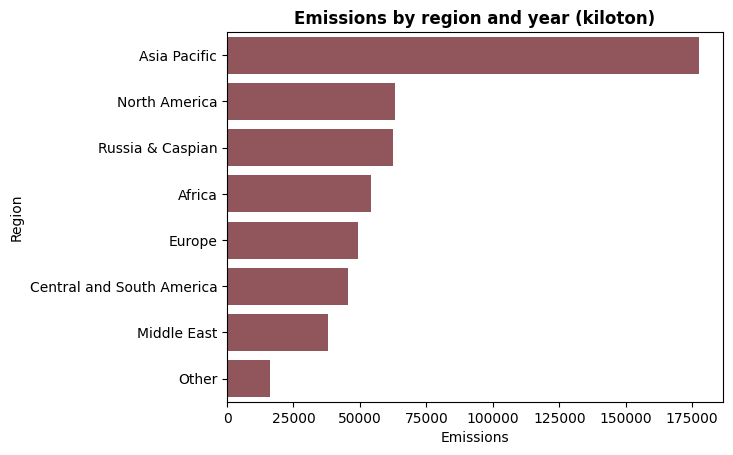

In [58]:
df_region_by_emmision = df_region_by_emmision.sort_values(by="emissions", ascending=False)

sns.barplot(data = df_region_by_emmision, y ="region", x ="emissions", errorbar=None, color=colors[0])
plt.ylabel("Region")
plt.xlabel("Emissions")
plt.title("Emissions by region and year (kiloton)", fontweight="bold")
plt.show()

### Question: 
### *What is the relationship between methane emissions and population by region?*


Region "Other" eliminated due to lack of information:

In [ ]:
df_region_emmision.drop(6, axis=0, inplace=True)

Adding the column "population" by region:

In [ ]:
population_region = np.array([1216,4300,669,746,411,579,193])

In [ ]:
df_region_emmision["population"]= population_region

In [ ]:
df_region_emmision

,region,Unnamed: 0,emissions,population
0,Africa,82215,54197.152613,1216
1,Asia Pacific,145935,177699.611465,4300
2,Central and South America,140361,45639.989799,669
3,Europe,304869,49208.996818,746
4,Middle East,234498,38095.798763,411
5,North America,84058,63347.409177,579
7,Russia & Caspian,141840,62421.612360,193


Adding the "relation e/p" column (relation between emissions and populations), using a lambda functionn


In [ ]:
df_region_emmision["relation e/p"] = df_region_emmision.apply(lambda x: x["emissions"] / x["population"], axis=1)

In [ ]:
df_region_emmision

,region,Unnamed: 0,emissions,population,relation e/p
0,Africa,82215,54197.152613,1216,44.570027
1,Asia Pacific,145935,177699.611465,4300,41.325491
2,Central and South America,140361,45639.989799,669,68.221210
3,Europe,304869,49208.996818,746,65.963803
4,Middle East,234498,38095.798763,411,92.690508
5,North America,84058,63347.409177,579,109.408306
7,Russia & Caspian,141840,62421.612360,193,323.428043


**Description of the relationship:**


*   The region with the highest methane emissions per inhabitant is Russia and the Caspian Sea and the lowest is Africa.
*   There is an indirect relationship between the amount of population and the amount of emissions per inhabitant.

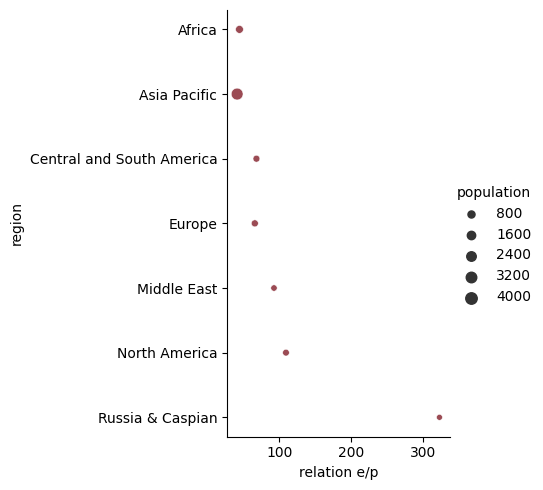

In [ ]:
sns.relplot(data=df_region_emmision, x="relation e/p",y="region", size="population", color="#9b4b54");

**Which sector generates the most methane?**

In [ ]:
df_region_emmision_type = df_emissions.groupby(["region","type"]).sum().reset_index()
df_region_emmision_type.head()

,region,type,Unnamed: 0,emissions
0,Africa,Agriculture,7474,16892.979230
1,Africa,Energy,59092,26535.878049
2,Africa,Other,7806,2744.415803
3,Africa,Waste,7843,8023.879531
4,Asia Pacific,Agriculture,8662,63241.493486


Removed the "world" region

In [ ]:
df_region_emmision_type = df_region_emmision_type[~(df_region_emmision_type["region"] == "World")]

In [ ]:
df_region_emmision_type.tail(2)

,region,type,Unnamed: 0,emissions
30,Russia & Caspian,Other,7437,347.049544
31,Russia & Caspian,Waste,7442,4562.902485


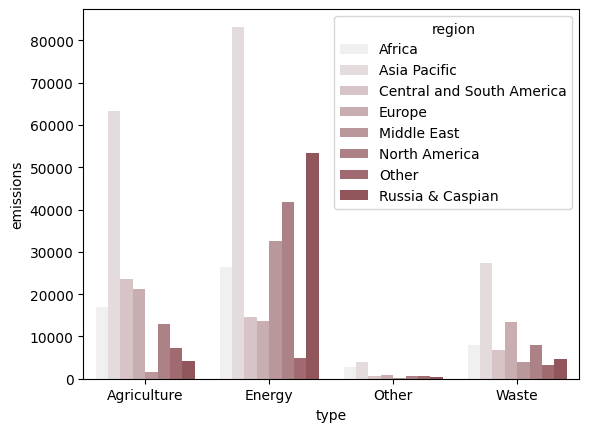

In [ ]:
sns.barplot(data=df_region_emmision_type, x="type", y="emissions", hue="region", color="#9b4b54");

**Colombian analysis:**



*   Record filter by country "Colombia"
*   "Total" record removed





In [ ]:
df_colombia_emmision = df_emissions[df_emissions["country"]=="Colombia"]
df_colombia_emmision= df_colombia_emmision[~(df_colombia_emmision["segment"]=="Total")]
df_colombia_emmision.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
731,731,Central and South America,Colombia,42.119999,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
732,732,Central and South America,Colombia,25.475300,Energy,Coking coal,All,2022,Not available
733,733,Central and South America,Colombia,20.607201,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
734,734,Central and South America,Colombia,10.987800,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
735,735,Central and South America,Colombia,1.987350,Energy,Offshore gas,Fugitive,2022,Not available


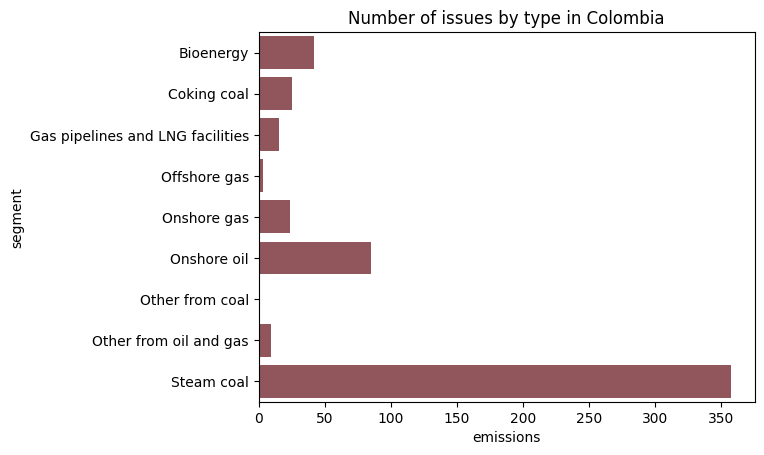

In [ ]:
sns.barplot(data=df_colombia_emmision, x="emissions", y="segment", errorbar=None, color="#9b4b54");
plt.title("Number of issues by type in Colombia");

**Emissions by world powers**


*   Created the list "world_powers"
*   Filtrada el data frame por las coincidencias en la lista previa
*   "Total" record removed








In [ ]:
world_powers=["United States", "Russia", "China", "Germany", "United Kingdom", "France", "Japan", "Israel", "Saudi Arabia", "United Arab Emirates"]

In [ ]:
df_world_powers = df_emissions[df_emissions["country"].str.contains('|'.join(world_powers), case=False)]

In [ ]:
df_world_powers = df_world_powers[~(df_world_powers["segment"]=="Total")]

In [ ]:
df_world_powers.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
461,461,Asia Pacific,China,984.200012,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
462,462,Asia Pacific,China,5418.770020,Energy,Coking coal,All,2022,Not available
463,463,Asia Pacific,China,552.119995,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
464,464,Asia Pacific,China,294.390991,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
465,465,Asia Pacific,China,16.911100,Energy,Offshore gas,Fugitive,2022,Not available


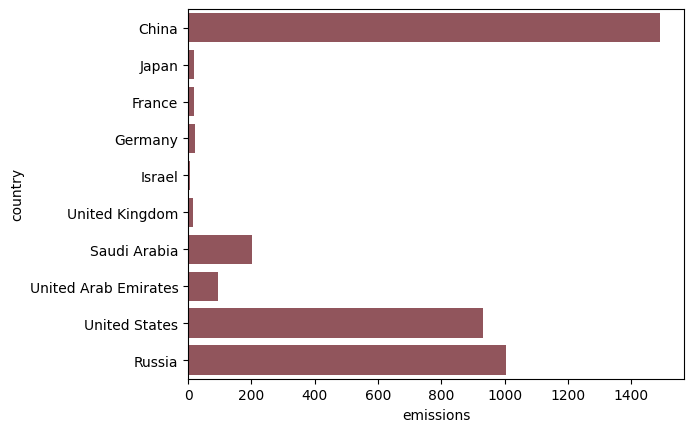

In [ ]:
sns.barplot(data=df_world_powers, x="emissions", y="country", errorbar=None, color="#9b4b54");

**United States emissions**

In [ ]:
df_us_emmision = df_emissions[df_emissions["country"]=="United States"]
df_us_emmision = df_us_emmision[~(df_us_emmision["segment"]=="Total")]
df_us_emmision.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
1388,1388,North America,United States,237.843994,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
1389,1389,North America,United States,829.182983,Energy,Coking coal,All,2022,Not available
1390,1390,North America,United States,1781.369995,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
1391,1391,North America,United States,949.828979,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
1392,1392,North America,United States,19.607901,Energy,Offshore gas,Fugitive,2022,Not available


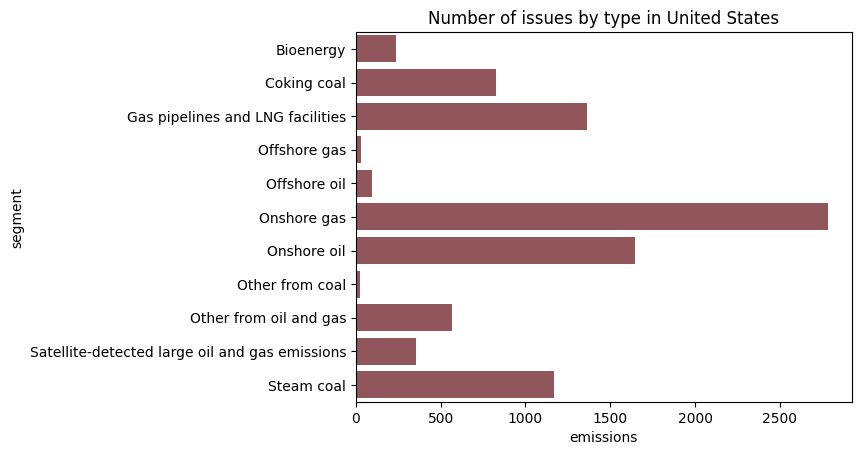

In [ ]:
sns.barplot(data=df_us_emmision, x="emissions", y="segment", errorbar=None,color="#9b4b54");
plt.title("Number of issues by type in United States");

**Comparison of emissions of the three great world powers by sector**

In [ ]:
df_us_chi_rus_emmision = df_emissions[df_emissions["country"].str.contains('|'.join(["United States", "Russia", "China"]), case=False)]
df_us_chi_rus_emmision = df_us_chi_rus_emmision[~(df_us_chi_rus_emmision["segment"]=="Total")]

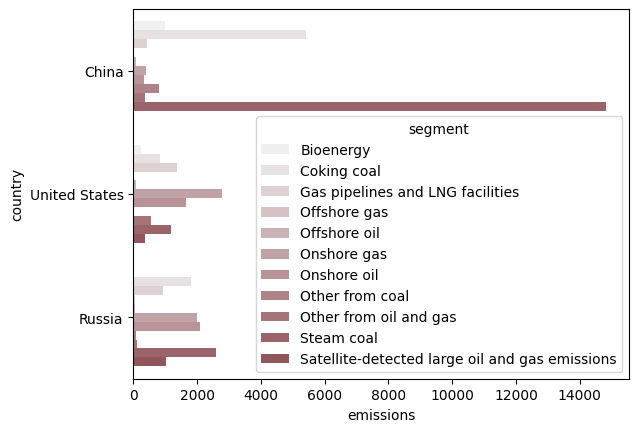

In [ ]:
sns.barplot(data=df_us_chi_rus_emmision, x="emissions",y="country", hue="segment", errorbar=None,color="#9b4b54");